### Importation des librairies

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)



2.8.0


In [5]:
data_train=[]
label_train=[]
data_test=[]
label_test=[]
Path_train ='./MNIST_Dataset_JPG_format/MNIST - JPG - training/'
Path_test ='./MNIST_Dataset_JPG_format/MNIST - JPG - testing/'
l=int(-1)
for i in os.listdir(Path_train) :
    l=l+1
    for j in os.listdir(Path_train+i) :
        image = cv2.imread(Path_train+i+'/'+j)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        data_train.append(image)
        label_train.append(l)
print('#############################')
l=-1
for i in os.listdir(Path_test) :
    l=l+1
    for j in os.listdir(Path_test+i) :
        image = cv2.imread(Path_test+i+'/'+j)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        data_test.append(image)
        label_test.append(l)

print('#############################')


#############################
#############################


Nombre d'image d'entrainement 60000
Nombre d'image de test 10000
classe : <class 'numpy.ndarray'>
type : uint8
taille : (28, 28)


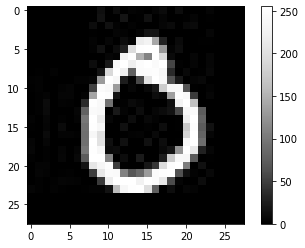

In [6]:
# informations
print("Nombre d'image d'entrainement", len(label_train))

print("Nombre d'image de test", len(label_test))

image_array = np.array( data_train )

print( 'classe :', type(image_array[0]))
print( 'type :', image_array[0].dtype)
print( 'taille :',image_array[0].shape)

plt.figure()
plt.imshow(image_array[4], cmap = 'Greys_r')
plt.colorbar()
plt.grid(False)
plt.show()


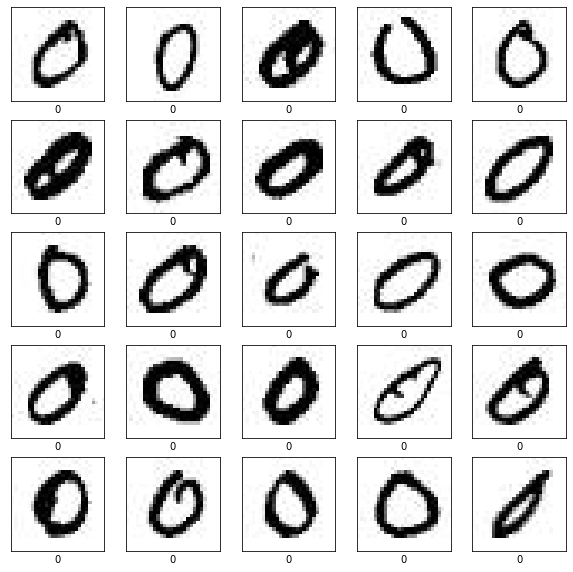

In [7]:
class_labels = ['0','1', '2', '3', '4','5', '6', '7', '8', '9']
X_train = data_train
X_test = data_test
y_train = label_train
y_test = label_test
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train=np.array(X_train)
X_test=np.array(X_test)


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[label_train[i]])
plt.show()




### Définition du réseau

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10,'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 92s 48ms/step - loss: 0.0657 - accuracy: 0.9807 - val_loss: 0.0464 - val_accuracy: 0.9856
Epoch 2/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.0391 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0397 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0324 - val_accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0332 -

313/313 - 2s - loss: 0.0347 - accuracy: 0.9897 - 2s/epoch - 7ms/step


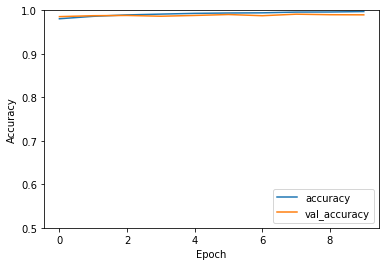

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


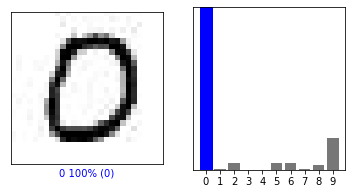

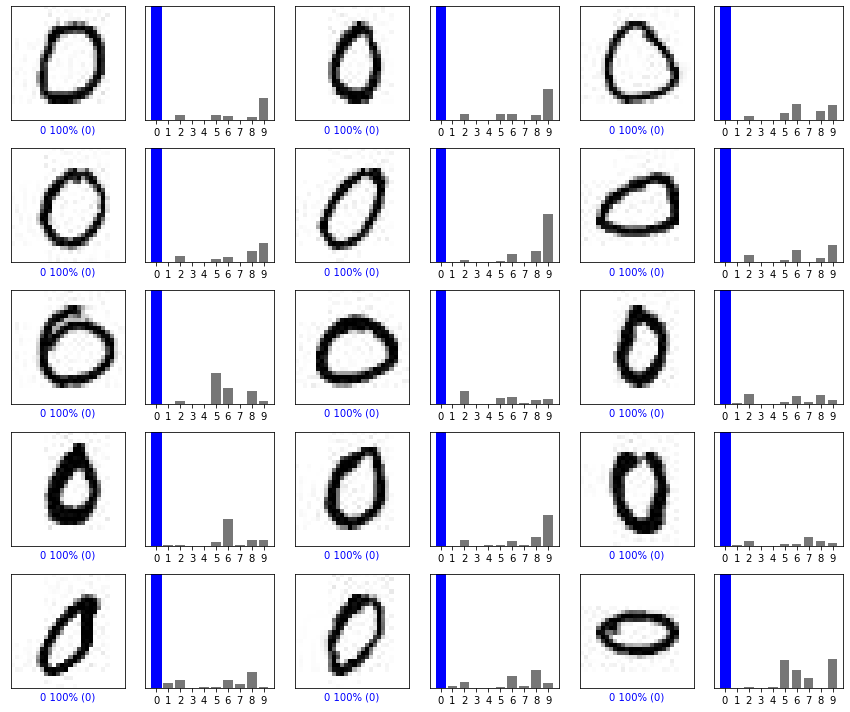

In [28]:
# probability_model = tf.keras.Sequential([model, 
#                                          tf.keras.layers.Softmax()])

predictions = model.predict(X_test)

predictions[0]
label_predit=np.argmax(predictions)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label],
                                100*np.max(predictions_array),
                                class_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [29]:
liste_labels=[]
for i in predictions :
    label_predit=predictions.argmax(axis=-1)
    liste_labels.append(label_predit)
print(label_predit.shape)

(10000,)


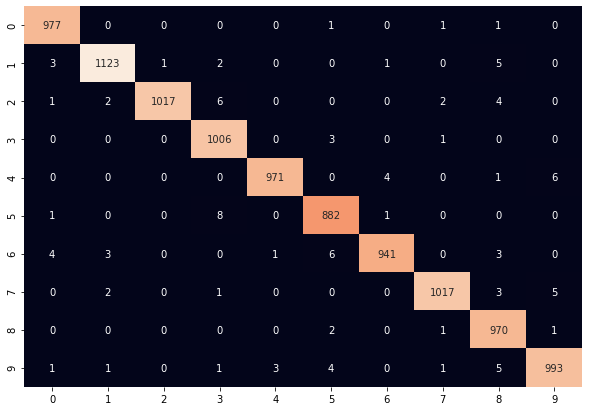

In [30]:
matrix= tf.math.confusion_matrix(
    y_test,
    label_predit,
    num_classes=10,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True, cbar=False, fmt="d", cmap="rocket")

## Essai avec un chiffre fait sur paint.

In [31]:
image_test = cv2.imread('dessin_test.png')
image_test=cv2.resize(image_test, [28,28])
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
image_test = np.expand_dims(image_test,axis=0)
# informations
print( 'classe :', type(image_test) )
print( 'type :', image_test.dtype )
print( 'taille :', image_test.shape )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (1, 28, 28)


In [32]:
prediction_test = model.predict(image_test)

print(prediction_test)
label_predit=np.argmax(prediction_test)
print("Le chiffre prédit est :", label_predit)

[[2.2997558e-03 2.1423191e-02 1.0210335e-02 8.4436142e-01 4.7761769e-06
  9.9824739e-01 5.1280856e-03 2.0855933e-02 4.5197070e-02 5.2530289e-01]]
Le chiffre prédit est : 5
